## Importing necessary libraries

In [31]:
import pandas as pd
import numpy 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
!pip install keras

In [3]:
pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in c:\users\hp\anaconda3\lib\site-packages (2.6.0)
Note: you may need to restart the kernel to use updated packages.


## Import Data

In [2]:
#  fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Forestfire = pd.read_csv('forestfires.csv')
Forestfire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## Data Understanding

In [3]:
Forestfire.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [4]:
Forestfire.shape

(517, 31)

In [5]:
Forestfire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
Forestfire.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

## Data Preparation

In [7]:
# Dummy variable already present so we can drop month and day

Forestfire.drop(['month','day'],axis=1,inplace=True)

In [8]:
Forestfire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [9]:
le = LabelEncoder()
Forestfire['size_category'] = le.fit_transform(Forestfire['size_category'])

In [10]:
Forestfire.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


## Model Building

In [11]:
X = Forestfire.drop('size_category',axis=1)
y = Forestfire['size_category']

In [12]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [14]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [15]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=15,stratify = y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((413, 28), (104, 28), (413,), (104,))

In [16]:
model = Sequential()
model.add(Dense(28,input_dim=28,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
# Compiling the model

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## Model Training

In [18]:
# fit the model
model.fit(X_train,y_train,validation_split=0.33,epochs=150,batch_size=10)

Epoch 1/150
28/28 [==============================] - 1s 17ms/step - loss: 0.6948 - accuracy: 0.5326 - val_loss: 0.7081 - val_accuracy: 0.6350
Epoch 2/150
28/28 [==============================] - 0s 3ms/step - loss: 0.6035 - accuracy: 0.7210 - val_loss: 0.6798 - val_accuracy: 0.7299
Epoch 3/150
28/28 [==============================] - 0s 3ms/step - loss: 0.5605 - accuracy: 0.7391 - val_loss: 0.6692 - val_accuracy: 0.7591
Epoch 4/150
28/28 [==============================] - 0s 3ms/step - loss: 0.5286 - accuracy: 0.7428 - val_loss: 0.6665 - val_accuracy: 0.7518
Epoch 5/150
28/28 [==============================] - 0s 10ms/step - loss: 0.5065 - accuracy: 0.7464 - val_loss: 0.6668 - val_accuracy: 0.7810
Epoch 6/150
28/28 [==============================] - 0s 4ms/step - loss: 0.4857 - accuracy: 0.7500 - val_loss: 0.6759 - val_accuracy: 0.7883
Epoch 7/150
28/28 [==============================] - 0s 4ms/step - loss: 0.4668 - accuracy: 0.7754 - val_loss: 0.6849 - val_accuracy: 0.7956
Epoch 8/150

## Model Testing

In [19]:
y_pred_train = model.predict(X_train)
rounded = [round(x[0]) for x in y_pred_train]

In [20]:
y_pred_train1 = pd.DataFrame(rounded)

In [21]:
y_pred_train1

,0
0,1
1,1
2,1
3,1
4,1
...,...
408,0
409,1
410,0
411,1


In [22]:
y_pred_test = model.predict(X_test)
rounded1    = [round(x[0]) for x in y_pred_test]

In [23]:
y_pred_test1 = pd.DataFrame(rounded1)
y_pred_test1

,0
0,0
1,1
2,1
3,1
4,1
...,...
99,0
100,1
101,1
102,1


## Model Evaluation

In [25]:
Accuracy_Train = model.evaluate(X_train,y_pred_train1,verbose=0)
Accuracy_Train

[0.01188281923532486, 1.0]

In [26]:
Accuracy_Test = model.evaluate(X_test,y_pred_test1,verbose=0)
Accuracy_Test

[0.019988011568784714, 1.0]

## Visualizing Accuracy and Loss

In [27]:
History = model.fit(X_test,y_pred_test1,validation_split=0.33,epochs=150,batch_size=10)

Epoch 1/150
7/7 [==============================] - 1s 14ms/step - loss: 0.0278 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 2/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 3/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 4/150
7/7 [==============================] - 0s 21ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 5/150
7/7 [==============================] - 0s 26ms/step - loss: 8.3475e-04 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 6/150
7/7 [==============================] - 0s 9ms/step - loss: 6.0861e-04 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 7/150
7/7 [==============================] - 0s 9ms/step - loss: 5.2513e-04 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 8/150


In [38]:
# Visualize training history 
# list all data in history

model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

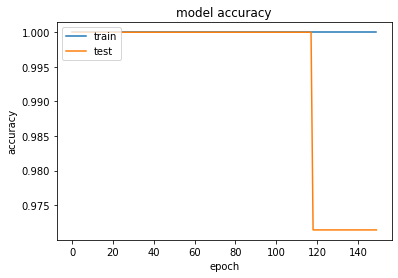

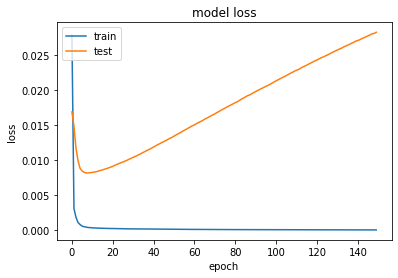

In [35]:
# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Tuning of Hyperparameters : Batch Size and epochs

In [53]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [40]:
!pip install optimizers

  Using cached requests-2.26.0-py2.py3-none-any.whl (62 kB)
  Created wheel for optimizers: filename=Optimizers-2.1-py3-none-any.whl size=2284 sha256=4a43e3b089ee7751872e24f62a8c0e81ae82c28cbf67614a9d502c02457ac8d1
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\56\a5\4d\f679a391b5fca0b18c5e2fcd66ebff8900d97d6d95713915b9
Successfully built optimizers
  Attempting uninstall: requests
    Found existing installation: requests 2.22.0
    Uninstalling requests-2.22.0:
      Successfully uninstalled requests-2.22.0


In [61]:
# create model
def create_model():
    model1 = Sequential()
    model1.add(Dense(30, input_dim=28, activation='relu'))
    model1.add(Dense(28, activation='relu'))
    model1.add(Dense(1,activation='sigmoid'))
    
   
    model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model1

In [62]:
# Create the model

model2 = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]

# Make a dictionary of the grid search parameters

param_grid = dict(batch_size = batch_size,epochs = epochs)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model2,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_scaled,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=0.942, total=   1.5s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.750, total=   1.6s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.621, total=   1.6s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.6s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.680, total=   1.5s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.728, total=   1.7s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.9s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.990, total=   3.7s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   11.6s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.846, total=   3.8s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   15.3s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.786, total=   4.1s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   19.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.854, total=   4.0s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   23.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.845, total=   4.0s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=1.000, total=   6.6s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.837, total=   7.2s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.845, total=   6.6s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.845, total=   6.5s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.835, total=   6.7s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.913, total=   1.4s
[CV] batch_size=20, epochs=10 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.2min finished


In [63]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8721620678901673, using {'batch_size': 10, 'epochs': 100}
0.7442867755889893,0.10844280768399954 with: {'batch_size': 10, 'epochs': 10}
0.8643950819969177,0.0674953630732254 with: {'batch_size': 10, 'epochs': 50}
0.8721620678901673,0.06404515982439624 with: {'batch_size': 10, 'epochs': 100}
0.7268670678138733,0.11563351113746635 with: {'batch_size': 20, 'epochs': 10}
0.8393764019012451,0.06777075568210428 with: {'batch_size': 20, 'epochs': 50}
0.8664488315582275,0.0626762747803529 with: {'batch_size': 20, 'epochs': 100}
0.7383681774139405,0.14049515570289045 with: {'batch_size': 40, 'epochs': 10}
0.7928117990493775,0.07401483310299616 with: {'batch_size': 40, 'epochs': 50}
0.8354928970336915,0.05605098103430018 with: {'batch_size': 40, 'epochs': 100}


### From summary we can say best result ,when batch-size = 10 and epochs=100

## Tuning of Hyperparameter :Number of neurons in activation layer

In [78]:
# Defining the model

def create_model1(neuron1,neuron2):
    model3 = Sequential()
    model3.add(Dense(neuron1,input_dim = 28,activation = 'relu'))
    model3.add(Dense(neuron2,activation = 'relu'))
    model3.add(Dense(1,activation = 'sigmoid'))
    
    model3.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    return model3


In [79]:
# Create the model

model4 = KerasClassifier(build_fn = create_model1,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [24,28,35]
neuron2 = [20,24,28]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid2        = GridSearchCV(estimator = model4,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result2 = grid2.fit(x_scaled,y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] neuron1=24, neuron2=20 ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. neuron1=24, neuron2=20, score=0.971, total=   2.4s
[CV] neuron1=24, neuron2=20 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] .............. neuron1=24, neuron2=20, score=0.750, total=   1.7s
[CV] neuron1=24, neuron2=20 ..........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


[CV] .............. neuron1=24, neuron2=20, score=0.583, total=   1.4s
[CV] neuron1=24, neuron2=20 ..........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.3s remaining:    0.0s


[CV] .............. neuron1=24, neuron2=20, score=0.680, total=   1.1s
[CV] neuron1=24, neuron2=20 ..........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.4s remaining:    0.0s


[CV] .............. neuron1=24, neuron2=20, score=0.709, total=   1.2s
[CV] neuron1=24, neuron2=24 ..........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.7s remaining:    0.0s


[CV] .............. neuron1=24, neuron2=24, score=0.981, total=   1.2s
[CV] neuron1=24, neuron2=24 ..........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.9s remaining:    0.0s


[CV] .............. neuron1=24, neuron2=24, score=0.750, total=   1.1s
[CV] neuron1=24, neuron2=24 ..........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.0s remaining:    0.0s


[CV] .............. neuron1=24, neuron2=24, score=0.524, total=   1.2s
[CV] neuron1=24, neuron2=24 ..........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   11.2s remaining:    0.0s


[CV] .............. neuron1=24, neuron2=24, score=0.660, total=   1.1s
[CV] neuron1=24, neuron2=24 ..........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   12.3s remaining:    0.0s


[CV] .............. neuron1=24, neuron2=24, score=0.699, total=   1.1s
[CV] neuron1=24, neuron2=28 ..........................................
[CV] .............. neuron1=24, neuron2=28, score=0.981, total=   1.1s
[CV] neuron1=24, neuron2=28 ..........................................
[CV] .............. neuron1=24, neuron2=28, score=0.750, total=   1.1s
[CV] neuron1=24, neuron2=28 ..........................................
[CV] .............. neuron1=24, neuron2=28, score=0.534, total=   1.2s
[CV] neuron1=24, neuron2=28 ..........................................
[CV] .............. neuron1=24, neuron2=28, score=0.689, total=   1.2s
[CV] neuron1=24, neuron2=28 ..........................................
[CV] .............. neuron1=24, neuron2=28, score=0.699, total=   1.1s
[CV] neuron1=28, neuron2=20 ..........................................
[CV] .............. neuron1=28, neuron2=20, score=0.971, total=   1.1s
[CV] neuron1=28, neuron2=20 ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.0min finished


In [80]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.740272581577301, using {'neuron1': 28, 'neuron2': 24}
0.7384055256843567,0.12879601496304818 with: {'neuron1': 24, 'neuron2': 20}
0.7228528738021851,0.1491213705393393 with: {'neuron1': 24, 'neuron2': 24}
0.7306198716163635,0.14444438776186963 with: {'neuron1': 24, 'neuron2': 28}
0.7384055256843567,0.13494324158624202 with: {'neuron1': 28, 'neuron2': 20}
0.740272581577301,0.1511392956202306 with: {'neuron1': 28, 'neuron2': 24}
0.7383681893348694,0.142228814012503 with: {'neuron1': 28, 'neuron2': 28}
0.7248506307601928,0.13245914481515295 with: {'neuron1': 35, 'neuron2': 20}
0.7248319745063782,0.1414576010419955 with: {'neuron1': 35, 'neuron2': 24}
0.734522032737732,0.129919852052271 with: {'neuron1': 35, 'neuron2': 28}


###  From summary best result at 1st layer 28 Neuron and 2nd layer 24 neuron

## Tuning Hyperparameter : Activation function

In [83]:
# Defining the model

def create_model2(activation_function):
    model4 = Sequential()
    model4.add(Dense(28,input_dim = 28,activation = activation_function))
    model4.add(Dense(24,activation = activation_function))
    model4.add(Dense(1,activation = 'sigmoid'))
    
    model4.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    return model4


In [84]:
# Create the model

model5 = KerasClassifier(build_fn = create_model2,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh']

# Make a dictionary of the grid search parameters

param_grids = dict(activation_function=activation_function)

# Build and fit the GridSearchCV

grid3        = GridSearchCV(estimator = model5,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result3 = grid3.fit(x_scaled,y)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] activation_function=softmax .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... activation_function=softmax, score=1.000, total=   1.7s
[CV] activation_function=softmax .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ......... activation_function=softmax, score=0.750, total=   1.5s
[CV] activation_function=softmax .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV] ......... activation_function=softmax, score=0.524, total=   1.4s
[CV] activation_function=softmax .....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s remaining:    0.0s


[CV] ......... activation_function=softmax, score=0.680, total=   1.8s
[CV] activation_function=softmax .....................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.3s remaining:    0.0s


[CV] ......... activation_function=softmax, score=0.699, total=   1.4s
[CV] activation_function=relu ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.6s remaining:    0.0s


[CV] ............ activation_function=relu, score=0.942, total=   1.4s
[CV] activation_function=relu ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.1s remaining:    0.0s


[CV] ............ activation_function=relu, score=0.740, total=   1.2s
[CV] activation_function=relu ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.2s remaining:    0.0s


[CV] ............ activation_function=relu, score=0.534, total=   1.1s
[CV] activation_function=relu ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   11.4s remaining:    0.0s


[CV] ............ activation_function=relu, score=0.680, total=   1.4s
[CV] activation_function=relu ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   12.8s remaining:    0.0s


[CV] ............ activation_function=relu, score=0.699, total=   1.3s
[CV] activation_function=tanh ........................................
[CV] ............ activation_function=tanh, score=0.942, total=   1.3s
[CV] activation_function=tanh ........................................
[CV] ............ activation_function=tanh, score=0.740, total=   1.5s
[CV] activation_function=tanh ........................................
[CV] ............ activation_function=tanh, score=0.612, total=   1.6s
[CV] activation_function=tanh ........................................
[CV] ............ activation_function=tanh, score=0.689, total=   1.6s
[CV] activation_function=tanh ........................................
[CV] ............ activation_function=tanh, score=0.728, total=   2.7s


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   22.7s finished


In [85]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.742363703250885, using {'activation_function': 'tanh'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax'}
0.7190627455711365,0.1315340802157195 with: {'activation_function': 'relu'}
0.742363703250885,0.10962020325271954 with: {'activation_function': 'tanh'}


### From summary best result when Activation function is 'tanh'